In [1]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import * 
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.data_process import *
from data.data_util import *
from tensorflow_eeg.eeg_net.eeg_rnn import*
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

## Load the subject 0 data 

In [2]:
subject_num = 6

X_train_val = load_data(data_type='X_train_val',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)
y_train_val = load_data(data_type='y_train_valid',
                                subject=subject_num,
                                data_sub_dir='band_pass_data',
                                downsampled=True)


X_test = load_data(data_type='X_test',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)

y_test = load_data(data_type="y_test",
                                data_sub_dir='band_pass_data',
                                subject=subject_num,
                             downsampled=True)

                            
print(X_train_val.shape)
print(y_train_val.shape)
print(X_test.shape)
print(y_test.shape)

(476, 22, 500)
(476,)
(100, 22, 500)
(100,)


## Test on 1D3LCNN


Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.530943	0.234375	1.421094	0.156250	
1	1.521522	0.257986	1.418147	0.145833	
2	1.494036	0.223090	1.419398	0.125000	
3	1.435506	0.291319	1.420901	0.145833	
4	1.425494	0.289931	1.418762	0.125000	
5	1.341272	0.355035	1.415080	0.125000	
6	1.374185	0.310764	1.414710	0.135417	
7	1.379041	0.286806	1.413476	0.156250	
8	1.370444	0.291667	1.410691	0.145833	
9	1.386116	0.297743	1.407273	0.145833	
10	1.337038	0.342014	1.403901	0.166667	
11	1.305694	0.392882	1.401162	0.197917	
12	1.311334	0.341146	1.399423	0.187500	
13	1.312028	0.352778	1.398487	0.229167	
14	1.260610	0.400347	1.397502	0.250000	
15	1.279942	0.344792	1.395758	0.239583	
16	1.283166	0.383681	1.393333	0.239583	
17	1.271181	0.390278	1.389375	0.239583	
18	1.284790	0.381076	1.387411	0.229167	
19	1.266938	0.394792	1.387792	0.239583	
20	1.266192	0.428646	1.388106	0.239583	
21	1.246456	0.371354	1.387351	0.239583	
22	1.227728	0.419097	1.384979	0.229167	
23	1.203299	0.456250	1.38

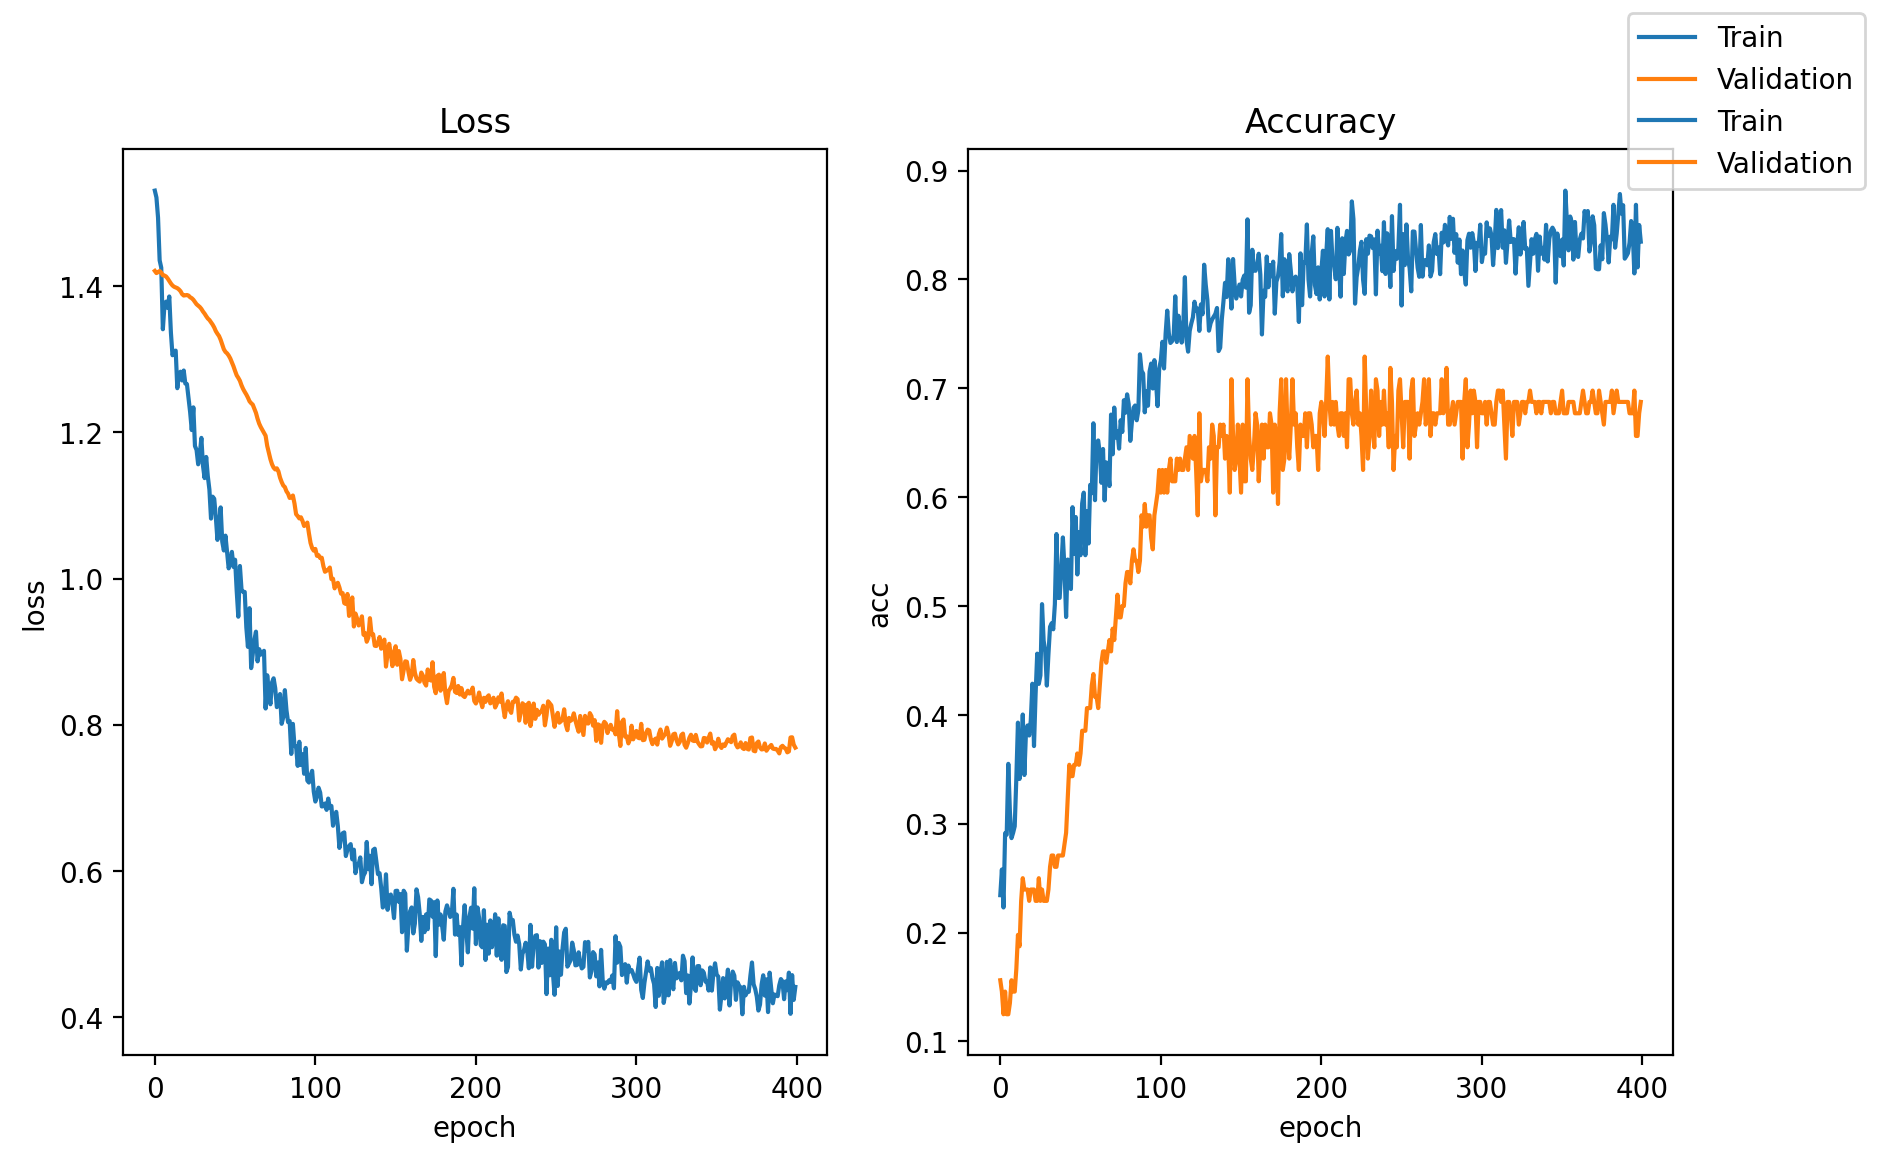

Test accuracy in trail 0: 0.71
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.443791	0.218750	1.381447	0.302083	
1	1.389128	0.311458	1.382087	0.291667	
2	1.357790	0.336979	1.375643	0.333333	
3	1.332519	0.355556	1.369470	0.333333	
4	1.296286	0.432465	1.362192	0.375000	
5	1.253752	0.465799	1.352938	0.364583	
6	1.251499	0.464236	1.344182	0.395833	
7	1.213890	0.499306	1.335703	0.364583	
8	1.214733	0.482639	1.323042	0.375000	
9	1.162466	0.532118	1.310091	0.416667	
10	1.165009	0.558854	1.297087	0.468750	
11	1.161540	0.523785	1.287395	0.468750	
12	1.088264	0.594271	1.278840	0.458333	
13	1.089302	0.587674	1.264560	0.489583	
14	1.037231	0.608333	1.255336	0.500000	
15	1.084742	0.579514	1.248626	0.510417	
16	1.047025	0.606771	1.236514	0.510417	
17	1.013064	0.660590	1.225059	0.520833	
18	0.992077	0.652431	1.213998	0.489583	
19	0.961765	0.666319	1.199308	0.489583	
20	0.960063	0.672743	1.186239	0.479167	
21	0.899503	0.736979	1.171704	0.520833	
22	0.897674	0.716146	1.162348	0.53

KeyboardInterrupt: 

In [3]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 22,
    'conv3_size': 5,
    'conv3_out_channel': 12,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'    
}
decoder_opt={
    'drop_rate': 0.9, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}
model_opt = {
    'decoder_opt':decoder_opt,
    'encoder_opt':encoder_opt,
}

train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 400,
    'downsample_split': True,
    'overfit_threshold':0
}
data_dir = {
    'X_train_dir': X_train_val,
    'y_train_dir':y_train_val,
    'X_test_dir': X_test,
    'y_test_dir':y_test,
}


loss_fn = nn.CrossEntropyLoss()

test_acc,avg_acc = avg_test_acc(EEG1D3LCNN,(1,22,500),data_dir,loss_fn,
                        train_options,model_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

In [ ]:
print('1D3LCNN average test accuracy:{}'.format(avg_acc))

## Test on PSCNN 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.393176	0.232118	1.410662	0.322917	
1	1.367220	0.286458	1.402682	0.229167	
2	1.348936	0.379514	1.380614	0.364583	
3	1.329005	0.427951	1.408804	0.187500	
4	1.323156	0.377257	1.372796	0.395833	
5	1.309017	0.517535	1.370713	0.375000	
6	1.292667	0.463021	1.388035	0.260417	
7	1.278783	0.552778	1.352127	0.427083	
8	1.260126	0.625868	1.368427	0.322917	
9	1.250909	0.589931	1.342961	0.500000	
10	1.241342	0.678472	1.341275	0.406250	
11	1.223946	0.691667	1.329688	0.500000	
12	1.214067	0.685937	1.325277	0.479167	
13	1.201995	0.716493	1.316195	0.531250	
14	1.192904	0.726389	1.314672	0.479167	
15	1.182608	0.705903	1.300675	0.531250	
16	1.174354	0.732118	1.298525	0.510417	
17	1.167161	0.725000	1.292015	0.520833	
18	1.155763	0.716319	1.270324	0.562500	
19	1.141708	0.734549	1.262518	0.552083	
20	1.130762	0.769271	1.236017	0.687500	
21	1.118279	0.787500	1.227503	0.697917	
22	1.104906	0.805382	1.211497	0.697917	
23	1.091356	0.842187	1.20

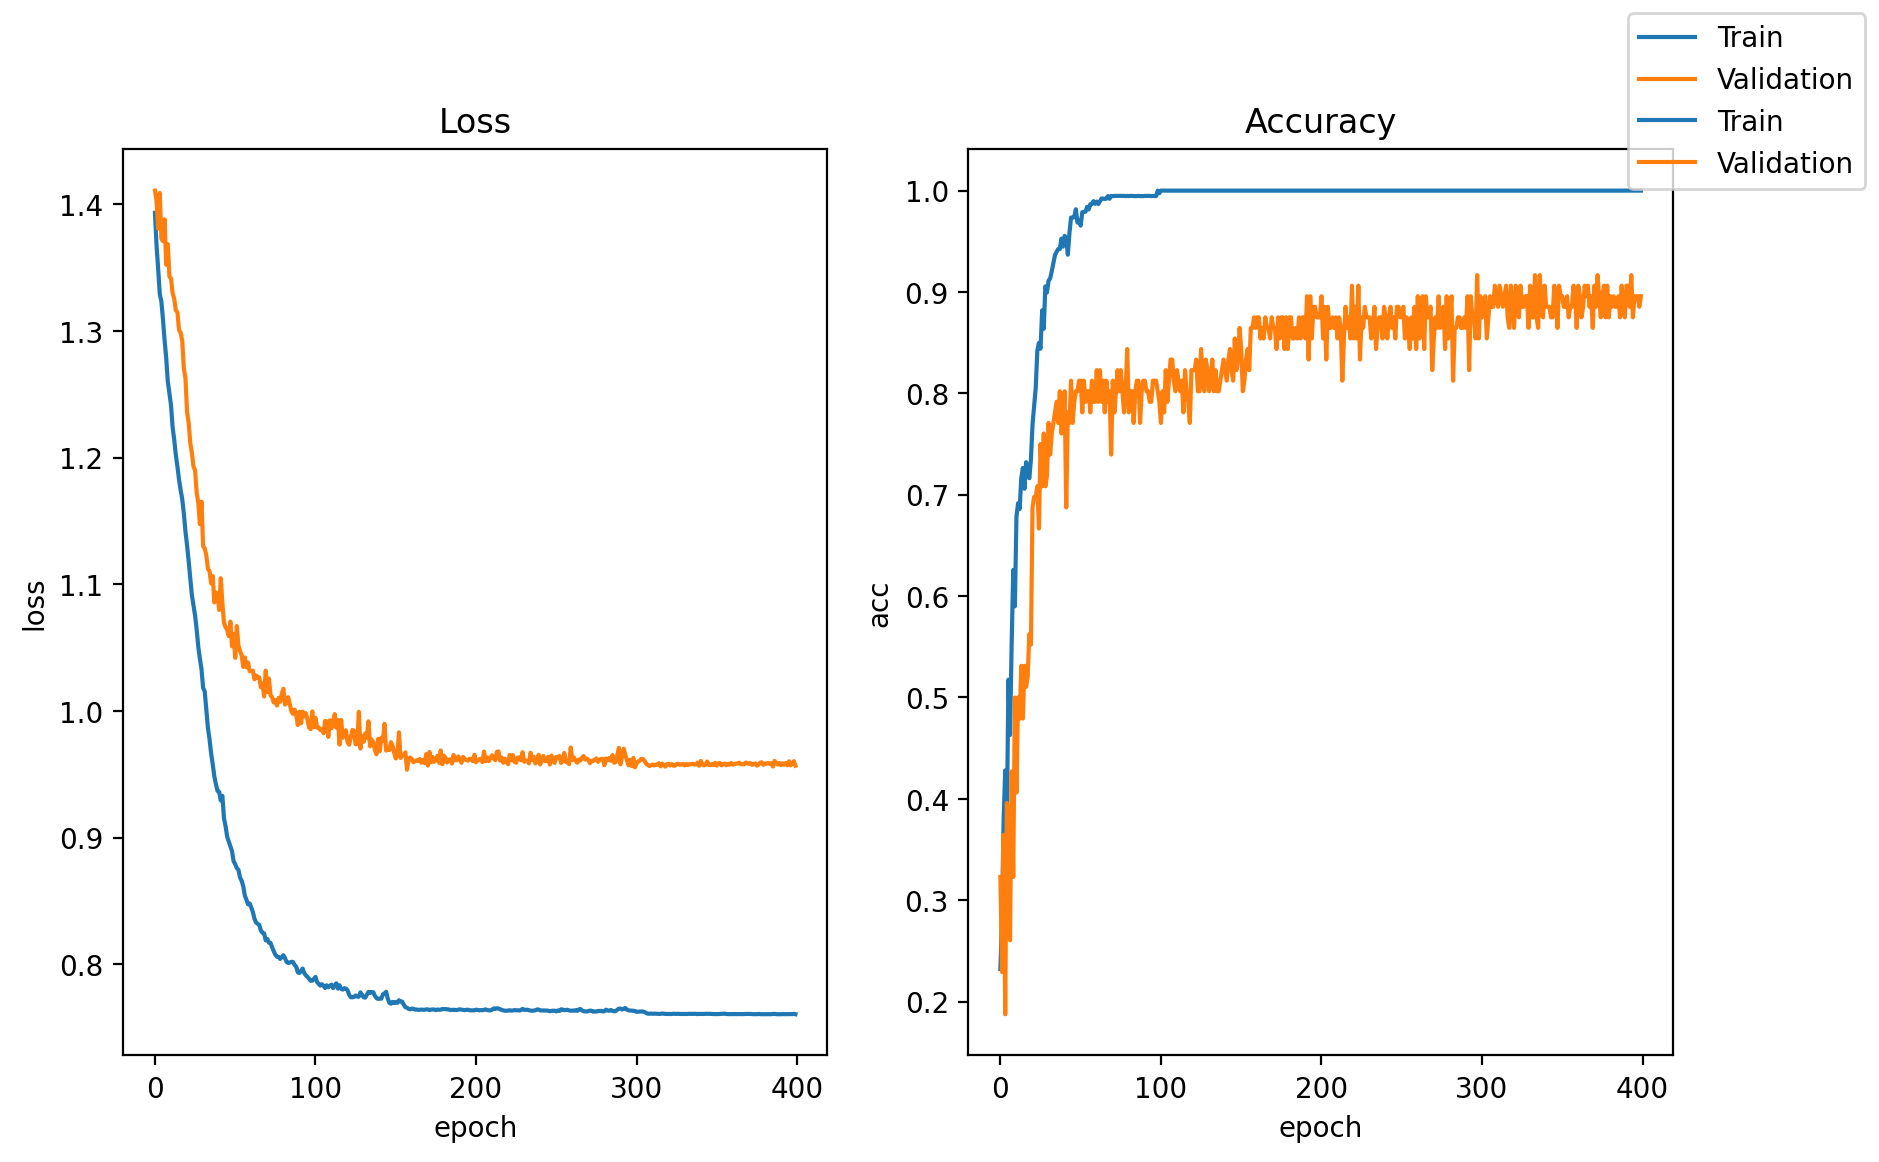

Test accuracy in trail 0: 0.78
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.398175	0.227431	1.399777	0.218750	
1	1.375312	0.321181	1.408701	0.250000	
2	1.358423	0.395486	1.397517	0.270833	
3	1.338598	0.436632	1.382999	0.291667	
4	1.322741	0.459896	1.367700	0.343750	
5	1.308273	0.493229	1.354153	0.416667	
6	1.295387	0.510417	1.347908	0.437500	
7	1.283303	0.484375	1.338636	0.427083	
8	1.269670	0.519444	1.331201	0.437500	
9	1.259057	0.599132	1.322101	0.427083	
10	1.248011	0.565625	1.317322	0.427083	
11	1.242046	0.632639	1.304525	0.479167	
12	1.221965	0.649306	1.297225	0.489583	
13	1.205241	0.684722	1.292747	0.520833	
14	1.191289	0.744444	1.279993	0.531250	
15	1.181225	0.750174	1.276875	0.583333	
16	1.167034	0.812847	1.262724	0.604167	
17	1.159679	0.735069	1.252556	0.625000	
18	1.143011	0.844792	1.246230	0.635417	
19	1.126536	0.842187	1.232125	0.625000	
20	1.114842	0.847222	1.231585	0.625000	
21	1.096212	0.869444	1.218697	0.625000	
22	1.083092	0.895139	1.212650	0.64

KeyboardInterrupt: 

In [4]:
train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.3,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 400,
    'downsample_split': True,
    'overfit_threshold':0,
}
dsp_opt ={
    'conv_size':[7,13],
    'conv_out_channel' : [10,10],
    'fc1_out_channel' :64,
    'dropout_rate':0.9,
}

loss_fn = nn.CrossEntropyLoss()

data_dir = {
    'X_train_dir': X_train_val,
    'y_train_dir':y_train_val,
    'X_test_dir': X_test,
    'y_test_dir':y_test,
}

test_acc,avg_acc = avg_test_acc(PSCNN,(1,22,500),data_dir,loss_fn,
                        train_options,dsp_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

In [ ]:
print('PSCNN average test accuracy:{}'.format(avg_acc))

## Test on TSCNN 

In [ ]:
encoder_opt = {
    'gate_conv_size': 7,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 7,
    'feature_conv_size':3,
    'feature_conv_out_channel': 64,
    'feature_pool_size': 7,
    'activation': 'elu',
}
model_opt = {
    'decoder_opt':{},
    'encoder_opt':encoder_opt,
}

#model = EEGCNNv2(1,4,encoder_opt=encoder_opt,input_size=(1,22,500)).to('cuda')

train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 100,
    
    'scheduler_factor': 0.3,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 200,
    'downsample_split': True,
    'overfit_threshold':0,
}
loss_fn = nn.CrossEntropyLoss()

data_dir = {
    'X_train_dir': X_train_val,
    'y_train_dir':y_train_val,
    'X_test_dir': X_test,
    'y_test_dir':y_test,
}

test_acc,avg_acc = avg_test_acc(TSCNN,(1,22,500),data_dir,loss_fn,
                        train_options,model_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

In [ ]:
print('TSCNN average test accuracy:{}'.format(avg_acc))

## Test on CNN+LSTM


## load data


In [ ]:

X_train_val = load_data(data_type='X_train_val',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)
y_train_val = load_data(data_type='y_train_valid',
                                subject=subject_num,
                                data_sub_dir='band_pass_data',
                                downsampled=True)


X_test = load_data(data_type='X_test',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)

y_test = load_data(data_type="y_test",
                                data_sub_dir='band_pass_data',
                                subject=subject_num,
                             downsampled=True)
y_train_val -=769
y_test -=769

train_num = int(X_train_val.shape[0]*0.8)
val_num = int(X_train_val.shape[0]-train_num)

(X_train, X_valid),(y_train,y_valid) = downsampled_cross_split(X_train_val,y_train_val,(train_num,val_num))

y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_train.shape[2], 1)


X_train = np.swapaxes(X_train, 1,3)
X_train = np.swapaxes(X_train, 1,2)
X_valid = np.swapaxes(X_valid, 1,3)
X_valid = np.swapaxes(X_valid, 1,2)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = np.swapaxes(X_test, 1,3)
X_test = np.swapaxes(X_test, 1,2)
y_test = to_categorical(y_test, 4)




In [ ]:
epochs = 200
test_acc = [] 
for i in np.arange(10):
    model = CNN_LSTM()
    model_result = model.fit(X_train,
                y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(X_valid, y_valid), verbose=True)
    score = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(score[1])
    print('The test accuracy is :{}'.format(score[1]))

In [ ]:
avg_acc=sum(test_acc)/len(test_acc)
print('CNN+LSTM average test accuracy:{}'.format(avg_acc))
